In [5]:
import torch.nn as nn

from datasets import *
from evaluation import *
from models import *
from pruning.unstructured import *
from pruning.structured import *

In [6]:
dataset = MNIST()
train_loader, test_loader = dataset.get_dataloader()

In [7]:
#train model and return it
model = Lenet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
model = Trainer(model, 2, train_loader, criterion, optimizer)
original_model = model.train()
print("Accuracy of original model : ", accuracy(original_model, test_loader))

 50%|█████     | 1/2 [00:06<00:06,  6.74s/it]

Epoch: 1 | train_loss: 4.9498 | 


100%|██████████| 2/2 [00:13<00:00,  6.76s/it]

Epoch: 2 | train_loss: 3.5713 | 


Accuracy of original model :  [98.15]


Model latency = 1.1640942096710205 Pruned model latency = 1.1422502994537354
Model latency = 1.1363434791564941 Pruned model latency = 1.1314830780029297
Model latency = 1.1684670448303223 Pruned model latency = 1.153501033782959
Model latency = 1.145308494567871 Pruned model latency = 1.1658720970153809
Model latency = 1.1743495464324951 Pruned model latency = 1.1711206436157227
Model latency = 1.1697306632995605 Pruned model latency = 1.186037540435791
Model latency = 1.132666826248169 Pruned model latency = 1.1875367164611816
Model latency = 1.1696696281433105 Pruned model latency = 1.1337497234344482
Model latency = 1.1512558460235596 Pruned model latency = 1.1600148677825928
Model latency = 1.1615512371063232 Pruned model latency = 1.1431424617767334
Model latency = 1.2383756637573242 Pruned model latency = 1.2009508609771729
Model latency = 1.1271188259124756 Pruned model latency = 1.1595027446746826
Model latency = 1.1882190704345703 Pruned model latency = 1.1778604984283447
Mod

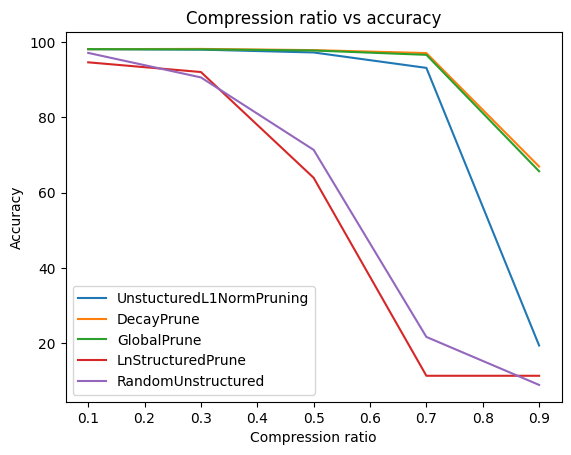

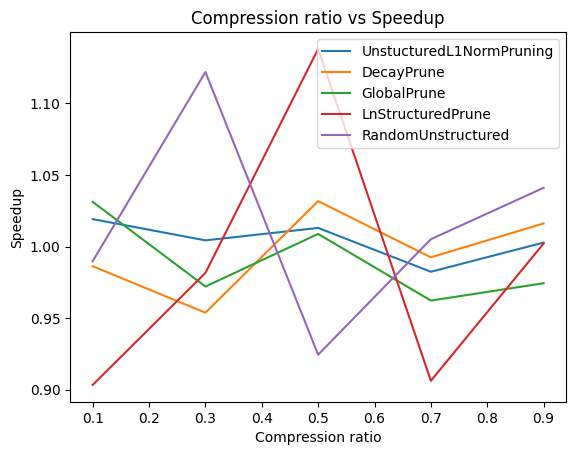

In [8]:
pruning_techniques = {
    "UnstucturedL1NormPruning":UnstructuredL1normPrune(),
    "DecayPrune":DecayPrune(),
    "GlobalPrune":GlobalPrune(),
    "LnStructuredPrune":LnStructuredPrune(),
    "RandomUnstructured":RandomUnstructured()
    }
# print(type(UnstructuredL1normPrune))
compare_compression_ratio_vs_accuracy(original_model, dataset ,pruning_techniques)